#### C&S10.1 Drug Dissolve (Python code is for one coated pill)

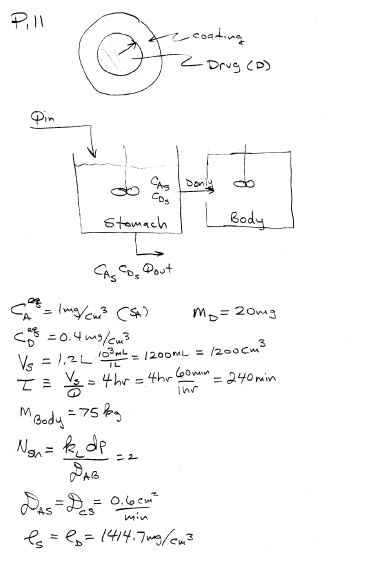

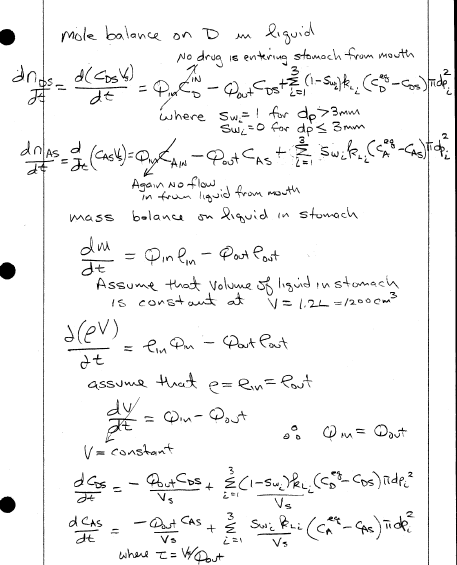

The following derivation is for one pill dissolving.  You will need to make modifications for part a to include 3 pills dissolving which is given in the summations above

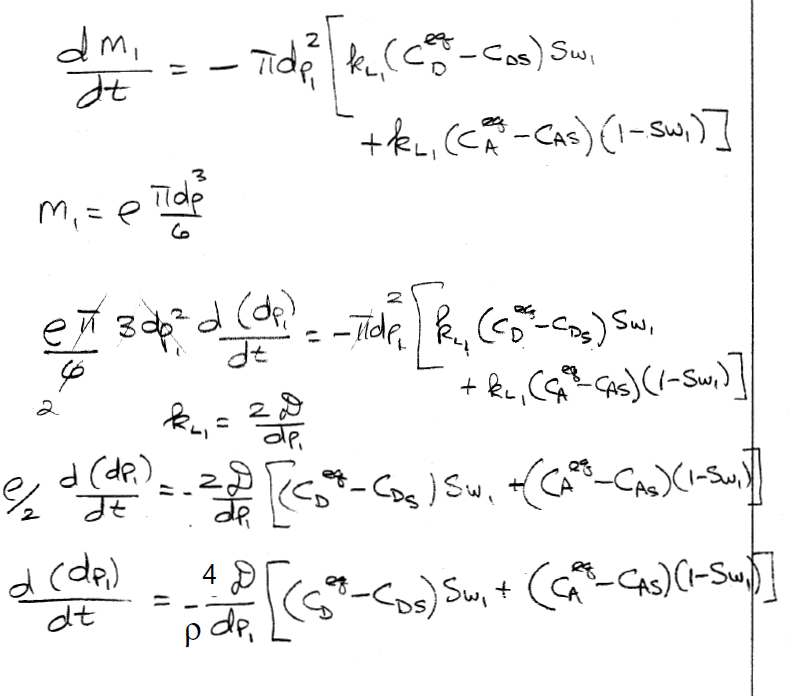

In [18]:
#  These are imports that we need to be able to run the ODE solver and plot the results. ivp stands for initial value problem.
import numpy as np
from scipy.integrate import solve_ivp
import math
import matplotlib.pyplot as plt

In [19]:
#This tests the if, elif, else logic
D1=0.4
if D1>0.3:
    dD1dt =  -2 
elif D1 > 1e-6:
    dD1dt=-3
else: 
    dD1dt=0.0

print(D1,dD1dt)

0.4 -2


In [20]:
# This code defines the functions to calculate the differential equations described above in (14) and (15)
def  ODEfun(z,Yfuncvec):
     
    CAS = Yfuncvec[0] 
    CDS = Yfuncvec[1]
    D1 = Yfuncvec[2]
    D2 = Yfuncvec[3]
    D3 = Yfuncvec[4]
    
    kL1 = 2 * 0.6 / D1
    SA = 1.0
    rho = 1414.7
    SD = 0.4
    V = 1200
    if D1>0.3:
        SW1=1.0
    else:
        SW1=0
    if D2>0.3:
        SW2=1.0
    else:
        SW2=0
    kL2 = 2 * 0.6 / D2
    if D3>0.3:
        SW3=1.0
    else:
        SW3=0
    kL3 = 2 * 0.6 / D3
    tau = 240
     
    if D1>0.3:
        dD1dt =  -2 * kL1 * (SA - CAS) / rho 
    elif D1 > 1e-6:
        dD1dt=-2 * kL1 * (SD - CDS) / rho 
    else: 
        dD1dt=0.0

    dCASdt = (1 / V) * (SW1 * kL1 * (SA - CAS) * 3.1416 * D1 ** 2 + SW2 * kL2 * (SA - CAS) * 3.1416 * D2 ** 2 + SW3 * kL3 * (SA - CAS) * 3.1416 * D3 ** 2) - CAS / tau
    dCDSdt = (1 / V) * ((1 - SW1) * kL1 * (SD - CDS) * 3.1416 * D1 ** 2 + (1 - SW2) * kL2 * (SD - CDS) * 3.1416 * D2 ** 2 + (1 - SW3) * kL3 * (SD - CDS) * 3.1416 * D3 ** 2) - CDS / tau

    if D2>0.3:
        dD2dt =  -2 * kL2 * (SA - CAS) / rho 
    elif D2 > 1e-6:
        dD2dt=-2 * kL2 * (SD - CDS) / rho 
    else: 
        dD2dt=0.0

    if D3>0.3:
        dD3dt =  -2 * kL3 * (SA - CAS) / rho 
    elif D3 > 1e-6:
        dD3dt=-2 * kL3 * (SD - CDS) / rho 
    else: 
        dD3dt=0.0
        
 
    dYfuncvecdz = [dCASdt,dCDSdt,dD1dt,dD2dt,dD3dt ] 
    return dYfuncvecdz

In [21]:
#test of function ODEfun  
zspan = [0, 100] # Range for the independent variable time
y0 = [0,0,0.5,0.4,0.35] # Initial values for the dependent variables 
# CAS,CDS,D1,D2, D3

sol=ODEfun(0.00,y0)
print (sol)
print(y0)
sol=solve_ivp(ODEfun,zspan,y0, rtol=1e-6)#solve the ODE at a higher accuracy equivalent to POLYMATH
print(sol)

[0.003927, 0.0, -0.003392945500812893, -0.004241181876016116, -0.004847065001161276]
[0, 0, 0.5, 0.4, 0.35]
  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 836
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 8.07141441e-02, 8.87855586e-01, 8.95927000e+00,
       9.71952329e+00, 1.03891672e+01, 1.09942500e+01, 1.70450778e+01,
       1.88601018e+01, 2.06751259e+01, 2.09946622e+01, 2.13141984e+01,
       2.19550396e+01, 2.25436902e+01, 2.84301966e+01, 3.96913131e+01,
       4.31833184e+01, 4.66753237e+01, 4.94149830e+01, 4.97429906e+01,
       5.00321724e+01, 5.02936562e+01, 5.29084946e+01, 5.81381713e+01,
       6.33678479e+01, 6.74374619e+01, 7.15070759e+01, 7.35013331e+01,
       7.54955904e+01, 7.65115252e+01, 7.75274601e+01, 7.80911182e+01,
       7.86547763e+01, 7.88520674e+01, 7.90254062e+01, 7.90740110e+01,
       7.90900899e+01, 7.91061689e+01, 7.91113687e+01, 7.91165686e+01,
   

In [22]:
#printing of the results
# Here we're going to re-run with 20 points to make a nice, smooth graph.  teval is 100 points from t = 0 to z = 100 min

teval=np.linspace(zspan[0],zspan[1],20)
sol=solve_ivp(ODEfun,zspan,y0,t_eval=teval,rtol=1e-6) # Same as before, just more z points for graphing


print('                     Summary of Results\n')

print('      time       CAS         CDS        D1         D2        D3 ')
print('     (min)    (mg/cm^3)   (mg/cm^3)    (cm)       (cm)      (cm)  ')


row=0
for row in range(20):
    print('{:10.4f} {:10.4f} {:10.4f} {:10.4f} {:10.4f} {:10.4f} '.format(sol.t[row],sol.y[0][row],sol.y[1][row],sol.y[2][row],sol.y[3][row],sol.y[4][row] ))

                     Summary of Results

      time       CAS         CDS        D1         D2        D3 
     (min)    (mg/cm^3)   (mg/cm^3)    (cm)       (cm)      (cm)  
    0.0000     0.0000     0.0000     0.5000     0.4000     0.3500 
    5.2632     0.0197     0.0000     0.4820     0.3773     0.3238 
   10.5263     0.0368     0.0003     0.4637     0.3535     0.2982 
   15.7895     0.0485     0.0022     0.4448     0.3285     0.2860 
   21.0526     0.0591     0.0039     0.4254     0.3016     0.2733 
   26.3158     0.0644     0.0074     0.4053     0.2887     0.2601 
   31.5789     0.0690     0.0106     0.3841     0.2764     0.2463 
   36.8421     0.0732     0.0136     0.3619     0.2635     0.2318 
   42.1053     0.0769     0.0164     0.3383     0.2501     0.2165 
   47.3684     0.0802     0.0188     0.3131     0.2361     0.2001 
   52.6316     0.0806     0.0220     0.2943     0.2213     0.1824 
   57.8947     0.0789     0.0257     0.2826     0.2055     0.1629 
   63.1579     0.0772  

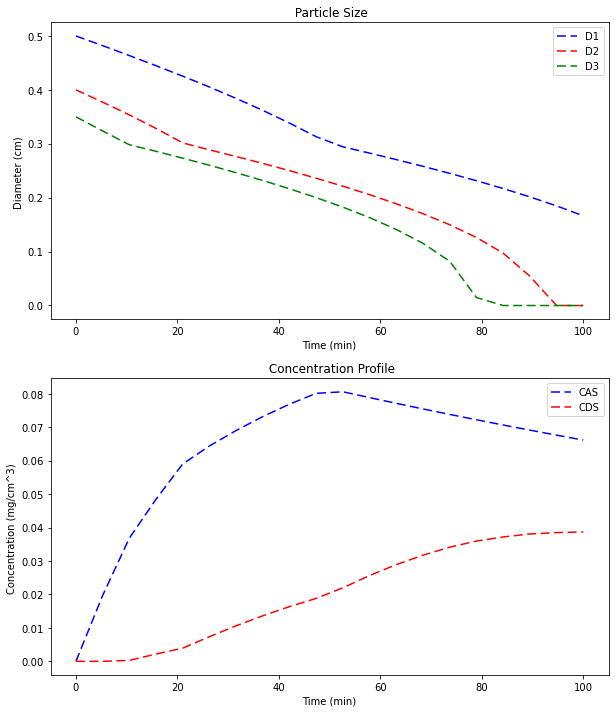

In [23]:
#plot the data

#plot the data
plt.figure(figsize=(10,12))

plt.subplot (2,1,1)
plt.plot(sol.t,sol.y[2],'b',label='D1',dashes=[6, 3]) #sol.t is the independent variable t 
plt.plot(sol.t,sol.y[3],'r',label='D2',dashes=[6, 3]) #sol.t is the independent variable t 
plt.plot(sol.t,sol.y[4],'g',label='D3',dashes=[6, 3]) #sol.t is the independent variable t 
plt.title(' Particle Size')
plt.xlabel('Time (min)')
plt.ylabel('Diameter (cm) ')
plt.legend()

plt.subplot (2,1,2)
#plt.ylim(0, 0.01)
plt.plot(sol.t,sol.y[0],'b',label='CAS',dashes=[6, 3])
plt.plot(sol.t,sol.y[1],'r',label='CDS',dashes=[6, 3])

plt.title(' Concentration Profile')
plt.xlabel('Time (min)')
plt.ylabel('Concentration (mg/cm^3) ')
plt.legend()
